In [31]:
import os
import re
import math
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import (

    LinearRegression,
    ElasticNet,
    Lasso,
    Ridge

)

from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor
)
from sklearn.ensemble import(
    RandomForestClassifier,
    RandomForestRegressor
)

from sklearn .metrics import (
    accuracy_score,
    roc_auc_score,
    roc_curve,
    root_mean_squared_error,
    mean_absolute_error,
    mean_squared_error,
    f1_score,
    classification_report,
confusion_matrix,
r2_score

)
from  sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    LabelBinarizer,
    LabelEncoder
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'e:\\ML_Elective\\Data_Science\\pandas\\Data_Analysis\\Used_Car_Performance_Estimation'

In [3]:
os.makedirs('ML_Models', exist_ok=True)

In [4]:
path = os.path.join('Data_Sets', 'Data_Sets.csv')

In [5]:
import os
import pandas as pd

file_path = os.path.join('Data_Sets', 'Data_Sets.csv')

if os.path.exists(file_path):
    df = pd.read_csv(' Data_Sets\Data_Sets.csv')
    print("File loaded successfully!")
else:
    print("File not found at:", file_path)


File not found at: Data_Sets\Data_Sets.csv


In [6]:
import os

file_path = r"E:\ML_Elective\Data_Science\pandas\Data_Analysis\Used_Car_Performance_Estimation\Data_Sets\Data_Sets.csv"

# Check if the path exists
print(os.path.exists(file_path))


False


In [7]:
import os
import pandas as pd

# Correct folder name
file_path = os.path.join('DataSet', 'Data_Sets.csv')

# Load the CSV
df = pd.read_csv(file_path)
print("File loaded successfully!")


File loaded successfully!


In [8]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [9]:
df['milage']=df['milage'].str.replace('mi.','').str.replace(',','').astype(float)
df['milage'].head()

0    51000.0
1    34742.0
2    22372.0
3    88900.0
4     9835.0
Name: milage, dtype: float64

In [10]:
# Clean the 'price' column
df['price']=df['price'].str.replace('$','').str.replace(',','').astype(float)
df['price'].dtype

dtype('float64')

In [11]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0


In [12]:
df['Engine_capicity']=df['engine'].str.extract(r'(\d+\.\d+L|\d+L|\d+\.\d+\s*Liter|\d\s*L|\d\s*Liter)')

In [13]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7L
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8L
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5 Liter
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5L
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0L


In [14]:
df['Engine_capicity']=df['Engine_capicity'].str.replace('Liter','').str.replace('L','').astype(float)

In [15]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0


In [16]:
df['engine'].head(20)


0     300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...
1                                  3.8L V6 24V GDI DOHC
2                                        3.5 Liter DOHC
3     354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...
4                            2.0L I4 16V GDI DOHC Turbo
5                                             2.4 Liter
6          292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
7          282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel
8         311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
9           534.0HP Electric Motor Electric Fuel System
10                                                   V6
11        715.0HP 5.2L 12 Cylinder Engine Gasoline Fuel
12    382.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
13        400.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
14                               2.0 Liter Supercharged
15         375.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
16                           2.0L I4 16V GDI DOHC Turbo
17        305.0HP 3.6L V6 Cylinder Engine Gasoli

In [17]:
df['Horse_Power'] = df['engine'].str.extract(r'(\d+(?:\.\d+)?)\s*HP', flags=re.IGNORECASE) # extracting Horse power


In [18]:
df['Horse_Power'] = df['Horse_Power'].astype(float)



In [19]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity,Horse_Power
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN


In [20]:
df.drop(columns=['engine'],axis=1,inplace=True)

df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity,Horse_Power
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN


In [21]:
df.tail()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity,Horse_Power
4004,Bentley,Continental GT Speed,2023,714.0,Gasoline,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,349950.0,6.0,NaN
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,53900.0,3.0,349.0
4006,Porsche,Taycan,2022,2116.0,NaN,Automatic,Black,Black,None reported,NaN,90998.0,NaN,NaN
4007,Ford,F-150 Raptor,2020,33000.0,Gasoline,A/T,Blue,Black,None reported,Yes,62999.0,3.5,450.0
4008,BMW,X3 xDrive30i,2020,43000.0,Gasoline,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,40000.0,2.0,248.0


In [22]:
df['Accident_Status']=df['accident'].apply(lambda x:"No" if x=="None reported" else "Yes")

In [23]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Engine_capicity,Horse_Power,Accident_Status
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,10300.0,3.7,300.0,Yes
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,38005.0,3.8,NaN,Yes
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,None reported,NaN,54598.0,3.5,NaN,No
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,None reported,Yes,15500.0,3.5,354.0,No
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,34999.0,2.0,NaN,No


In [24]:
df.drop('accident', axis=1, inplace=True)


In [25]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,Engine_capicity,Horse_Power,Accident_Status
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,Yes,10300.0,3.7,300.0,Yes
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005.0,3.8,NaN,Yes
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,NaN,54598.0,3.5,NaN,No
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,Yes,15500.0,3.5,354.0,No
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999.0,2.0,NaN,No


In [26]:
df.isnull()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,Engine_capicity,Horse_Power,Accident_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,False,False,False,False,False,False,False,False,False,False,False,True,False
4005,False,False,False,False,False,False,False,False,False,False,False,False,False
4006,False,False,False,False,True,False,False,False,True,False,True,True,False
4007,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
df.isnull().sum()

brand                0
model                0
model_year           0
milage               0
fuel_type          170
transmission         0
ext_col              0
int_col              0
clean_title        596
price                0
Engine_capicity    217
Horse_Power        808
Accident_Status      0
dtype: int64

In [28]:
missing_info={

}
for col in df.columns:
    if df[col].isnull().sum()>0:
        missing_count=(df[col].isnull().sum()/len(df))*100
        missing_info[col]=round(missing_count,2)
print('The missing value in percentage')
for col,perc in missing_info.items():
    print(f'{col}:{perc}%')

The missing value in percentage
fuel_type:4.24%
clean_title:14.87%
Engine_capicity:5.41%
Horse_Power:20.15%


In [29]:
df.head()

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,clean_title,price,Engine_capicity,Horse_Power,Accident_Status
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,6-Speed A/T,Black,Black,Yes,10300.0,3.7,300.0,Yes
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,8-Speed Automatic,Moonlight Cloud,Gray,Yes,38005.0,3.8,NaN,Yes
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,Automatic,Blue,Black,NaN,54598.0,3.5,NaN,No
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,7-Speed A/T,Black,Black,Yes,15500.0,3.5,354.0,No
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,8-Speed Automatic,Glacier White Metallic,Black,NaN,34999.0,2.0,NaN,No


In [30]:
# ploting the outliers 

numerical_columns=df.select_dtypes(include=['number','Float32','Float64','int32','int64']).columns
df[numerical_columns].head()

,model_year,milage,price,Engine_capicity,Horse_Power
0,2013,51000.0,10300.0,3.7,300.0
1,2021,34742.0,38005.0,3.8,NaN
2,2022,22372.0,54598.0,3.5,NaN
3,2015,88900.0,15500.0,3.5,354.0
4,2021,9835.0,34999.0,2.0,NaN


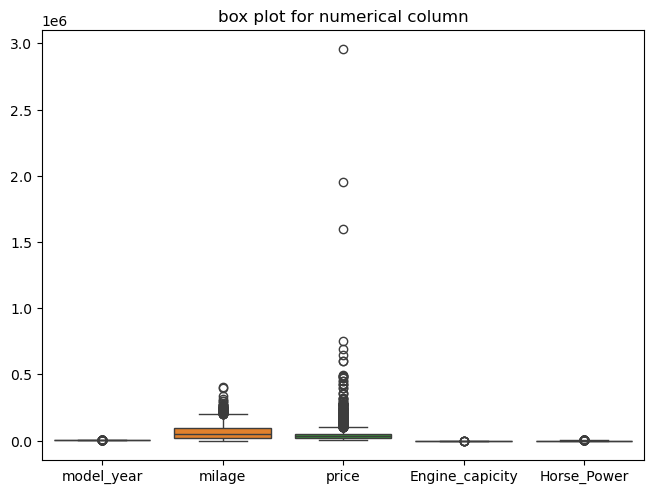

In [ ]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df)
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

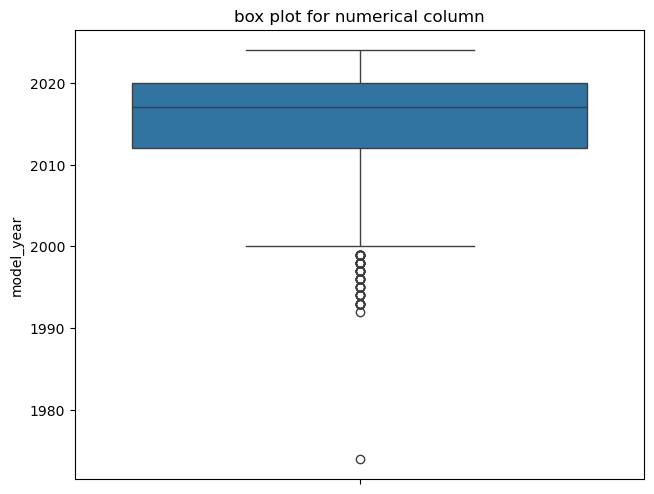

In [35]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df['model_year'])
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

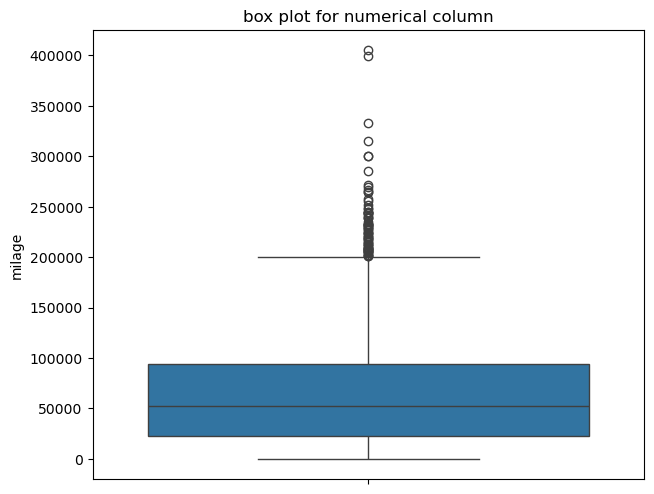

In [36]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df['milage'])
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

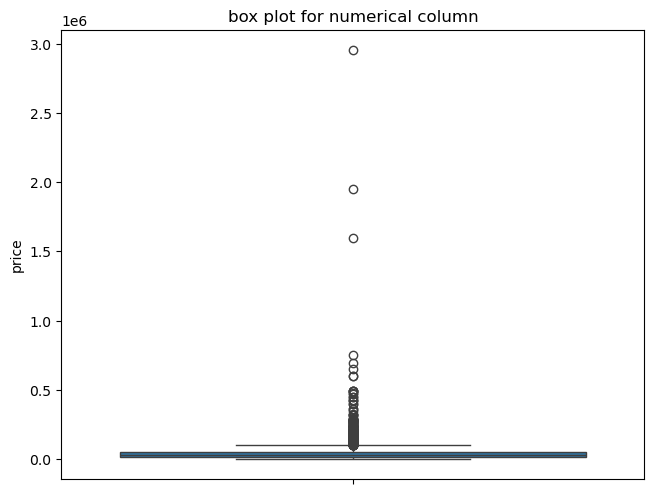

In [37]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df['price'])
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

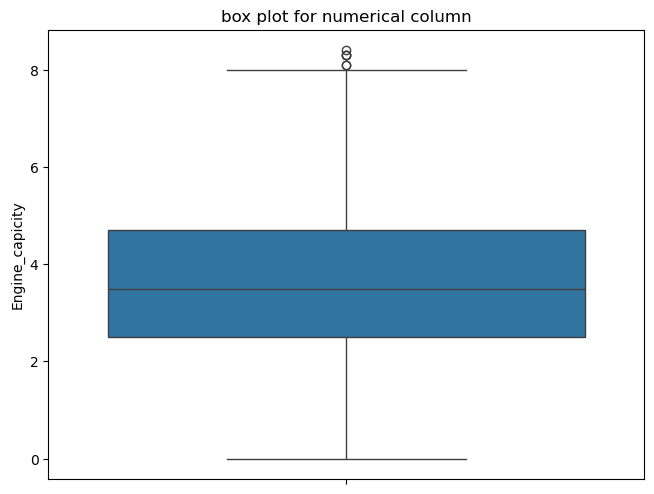

In [38]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df['Engine_capicity'])
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

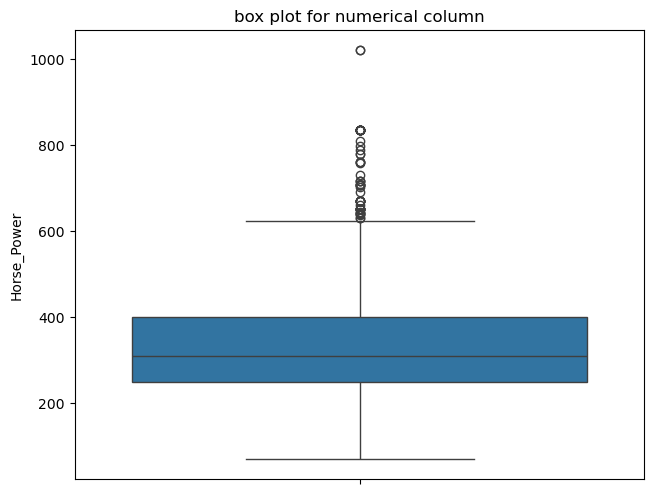

In [39]:
plt.Figure(figsize=(15,8))
sns.boxplot(data=df['Horse_Power'])
plt.title('box plot for numerical column')
plt.tight_layout(pad=0.2)
plt.show()

In [40]:
import numpy as np

x=np.array([2,4,6,8])

y1=np.exp(x)+np.sin(x)
y2=np.sin(x**2)+np.exp(x)+np.log(x)
y3=np.arctan(x)
y4=np.pi*x**3+np.cosh(x)
y5=np.sin(x)+np.cos(x)
y6=np.arctan(x)+np.sinh(x)

y1, y2, y3, y4, y5, y6


(array([   8.29835353,   53.84134754,  403.14937799, 2981.94734529]),
 array([   7.32540078,   55.69654108,  404.22877411, 2983.95745462]),
 array([1.10714872, 1.32581766, 1.40564765, 1.44644133]),
 array([  28.89493692,  228.37016267,  880.2996493 , 3098.97459989]),
 array([ 0.49315059, -1.41044612,  0.68075479,  0.84385821]),
 array([   4.73400913,   28.61573486,  203.11880502, 1491.92526712]))

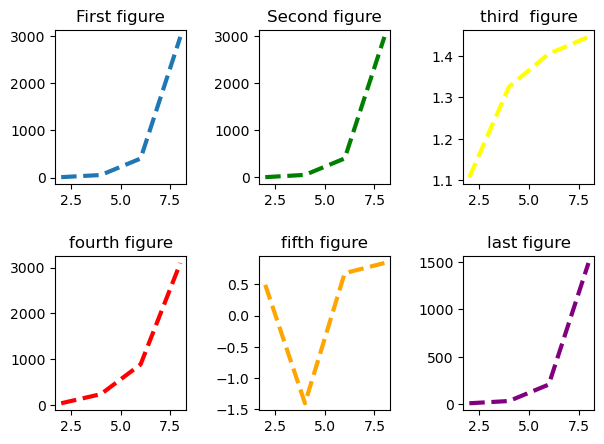

In [48]:
plt.subplot(2, 3, 1)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y1, linestyle='--', linewidth=3)
plt.title('First figure')

plt.subplot(2, 3, 2)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y2, linestyle='--', linewidth=3,color='green')
plt.title('Second figure')


plt.subplot(2, 3, 3)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y3, linestyle='--', linewidth=3,color='yellow')
plt.title('third  figure')


plt.subplot(2, 3, 4)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y4, linestyle='--', linewidth=3,color='red')
plt.title('fourth figure')


plt.subplot(2, 3, 5)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y5, linestyle='--', linewidth=3,color='orange')
plt.title('fifth figure')


plt.subplot(2, 3, 6)      # Create subplot position (row=2, col=3, index=1)
plt.plot(x, y6, linestyle='--', linewidth=3,color='purple')
plt.title('last figure')
plt.tight_layout(pad=2)
plt.show()

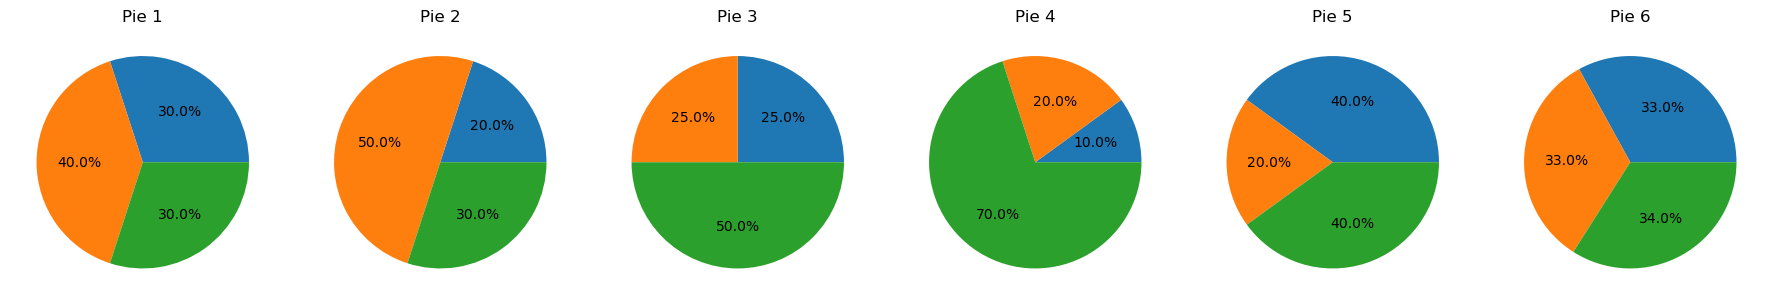

In [ ]:
# ploting the 6 pie chart in the same row 

data = [
    [30, 40, 30],
    [20, 50, 30],
    [25, 25, 50],
    [10, 20, 70],
    [40, 20, 40],
    [33, 33, 34]
]

titles = ["Pie 1", "Pie 2", "Pie 3", "Pie 4", "Pie 5", "Pie 6"]  # title of each piechart 

plt.figure(figsize=(18, 3))    

for i in range(6):
    plt.subplot(1, 6, i+1)          
    plt.pie(data[i], autopct='%1.1f%%')   
    plt.title(titles[i])

plt.tight_layout()
plt.show()


# Scatter Plot

In [51]:
x=[10,20,30,40,50,60,70,80,90]
a=[8,1,7,2,0,3,7,3,2]

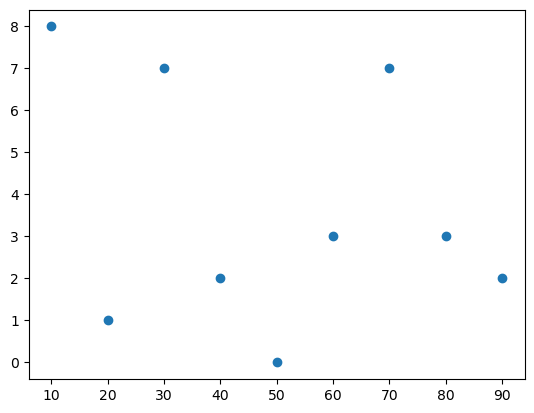

In [52]:
plt.scatter(x,a)
plt.show()

## Markers in the scatter plot

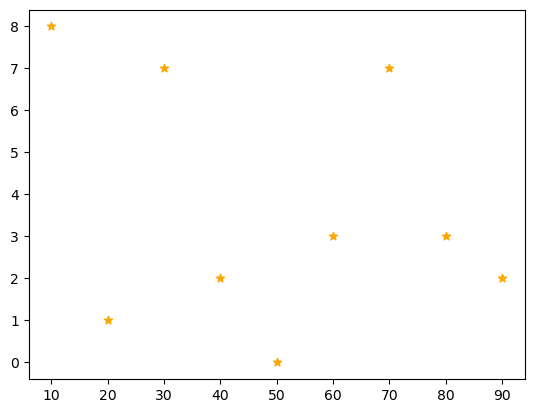

In [53]:
plt.scatter(x,a,marker='*',c='orange')
plt.show()

## Adding two markers in the same plot

In [54]:
z=[10,20,30,40,50,60,70,80,90]
x=[8,1,7,2,0,3,7,3,2]
y=[7,1,7,9,0,3,6,3,5]


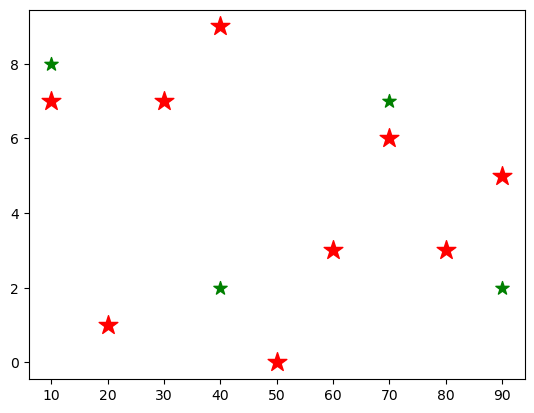

In [55]:
plt.scatter(z,x,marker='*',c='g',s=100)
plt.scatter(z,y,marker='*',c='r',s=200)
plt.show()

## Adding two subplots 

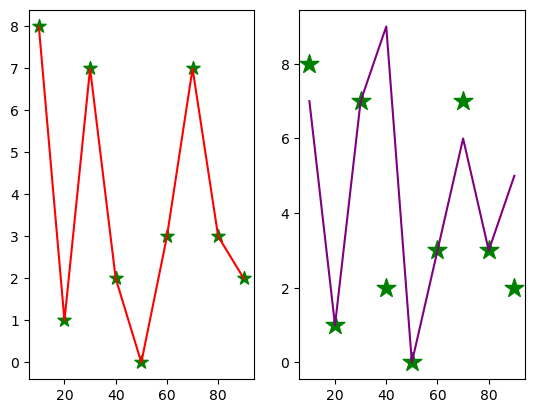

In [56]:
z=[10,20,30,40,50,60,70,80,90]
x=[8,1,7,2,0,3,7,3,2]
y=[7,1,7,9,0,3,6,3,5]
plt.subplot(1,2,1)
plt.plot(z,x,color='red')
plt.scatter(z,x,marker='*',c='g',s=100)

plt.subplot(1,2,2)
plt.plot(z,y,color='purple')
plt.scatter(z,x,marker='*',c='g',s=200)


## Pie chart

In [57]:
fruits = {
    'Apple': 20,
    'Papaya': 10,
    'Mango': 30,
    'Banana': 25,
    'Orange': 15,
    'Grapes': 18,
    'Pineapple': 12,
    'Strawberry': 22,
    'Kiwi': 8,
    'Watermelon': 35
}

print(fruits)


{'Apple': 20, 'Papaya': 10, 'Mango': 30, 'Banana': 25, 'Orange': 15, 'Grapes': 18, 'Pineapple': 12, 'Strawberry': 22, 'Kiwi': 8, 'Watermelon': 35}


In [58]:
keys=list(fruits.keys())
keys

['Apple',
 'Papaya',
 'Mango',
 'Banana',
 'Orange',
 'Grapes',
 'Pineapple',
 'Strawberry',
 'Kiwi',
 'Watermelon']

In [60]:
Values=list(fruits.values())
Values

[20, 10, 30, 25, 15, 18, 12, 22, 8, 35]

In [67]:
color=['red','green','blue','grey','purple','pink','yellow','white','cyan','magenta']

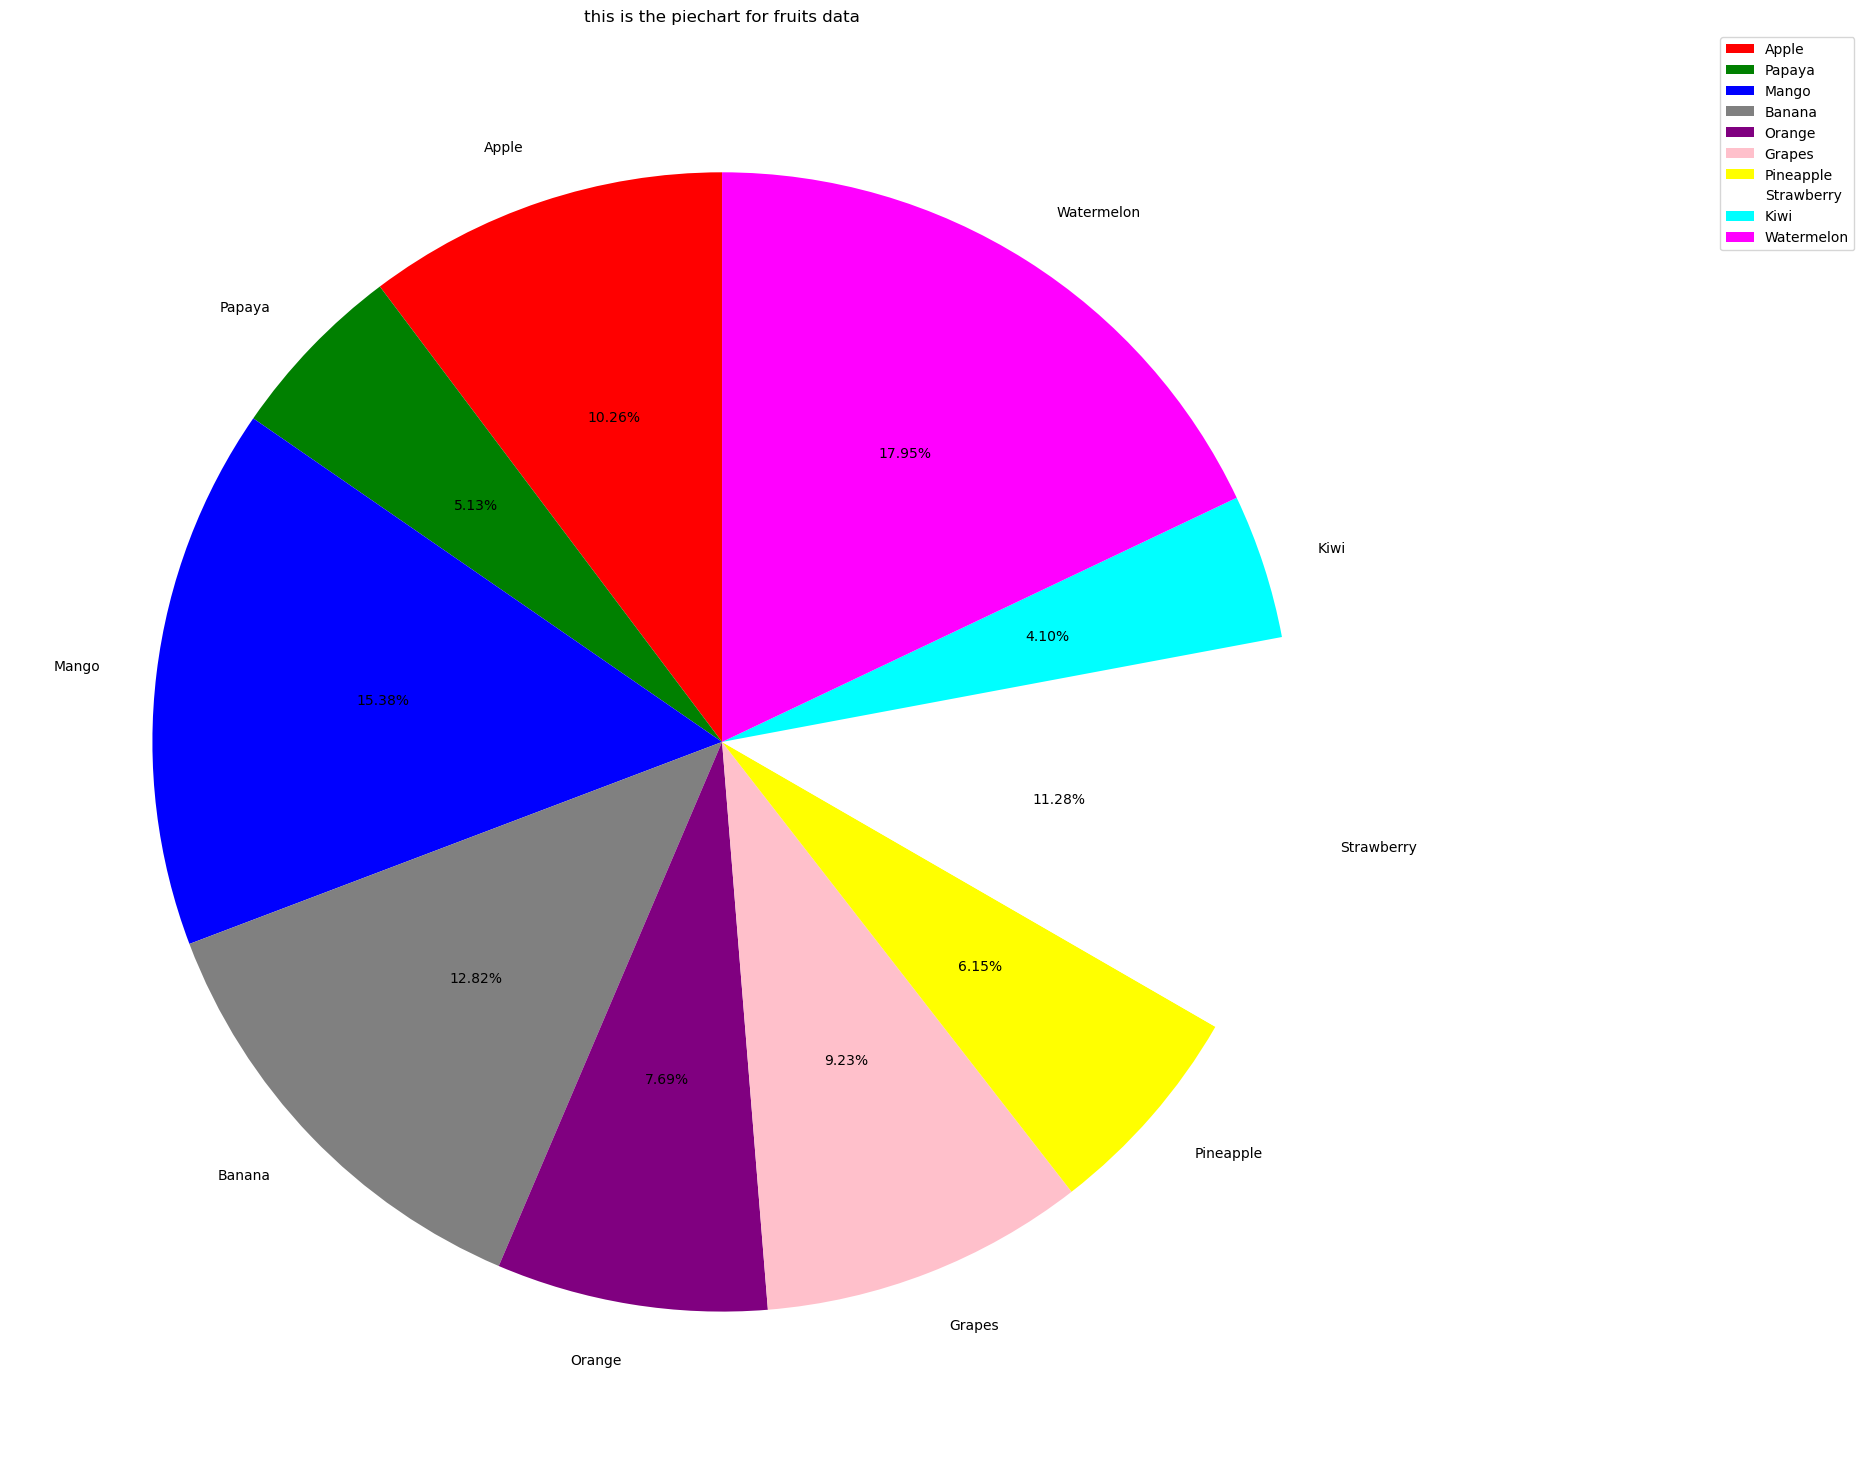

In [69]:
plt.figure(figsize=(20,15))
plt.pie(Values, labels=keys, colors=color, autopct='%0.2f%%', startangle=90)
plt.title('this is the piechart for fruits data')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout(pad=2)
plt.show()

In [ ]:

# Load iris dataset
df = sns.load_dataset('iris')

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


(array([ 5., 29.,  7.,  7.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  7.,  3.,
         5.,  0., 13.,  8., 12.,  4.,  2.,  0., 12.,  5.,  6.,  0.,  6.,
         3.,  8.,  3.,  3.]),
 array([0.1 , 0.18, 0.26, 0.34, 0.42, 0.5 , 0.58, 0.66, 0.74, 0.82, 0.9 ,
        0.98, 1.06, 1.14, 1.22, 1.3 , 1.38, 1.46, 1.54, 1.62, 1.7 , 1.78,
        1.86, 1.94, 2.02, 2.1 , 2.18, 2.26, 2.34, 2.42, 2.5 ]),
 <BarContainer object of 30 artists>)

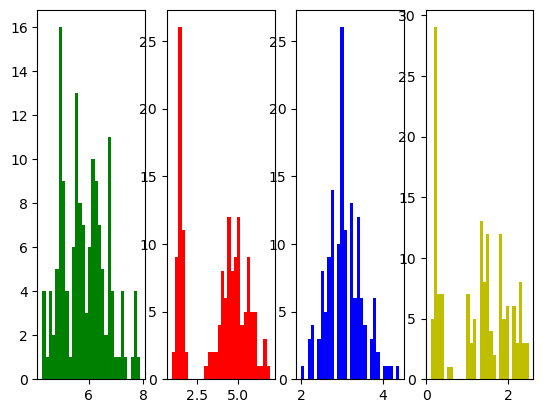

In [74]:
plt.subplot(1,4,1)
plt.hist(df['sepal_length'],bins=30,color='g')


plt.subplot(1,4,2)
plt.hist(df['petal_length'],bins=30,color='r')

plt.subplot(1,4,3)
plt.hist(df['sepal_width'],bins=30,color='b')

plt.subplot(1,4,4)
plt.hist(df['petal_width'],bins=30,color='y')